# Определение тональности текста отзывов на фильмы из IMDb (Internet Movie Database) 

Учебный курс "[Нейросети для анализа текстов](https://www.asozykin.ru/courses/nnpython)".

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Не забудьте подключить GPU, чтобы сеть обучалась быстрее (Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU).

## Набор данных IMDb movie review

[Набор данных IMDb movie review](https://ai.stanford.edu/~amaas/data/sentiment/) создан для задач определения тональности текста. Набор включает отзывы на фильмы с сайта [IMDb](https://www.imdb.com). Отзывы только явно положительные (оценка >= 7) или отрицательные (оценка <= 4), нейтральные отзывы в набор данных не включались.

Размер набора данных 50 тыс. отзывов:
- Набор данных для обучения - 25 тыс. отзывов
- Набор данных для тестирования - 25 тыс. отзывов

Количество положительных и отрицательных отзывов одинаковое.

Разметка набора данных:
- 0 - отзыв отрицательный
- 1 - отзыв положительный

С точки зрения машинного обучения это задача бинарной классификации.

Набор данных описан в статье: [Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011)](https://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf).

<img src="https://www.dropbox.com/s/grd17bkapocb92o/imdb_movie_reviews.png?dl=1" width="600">


In [0]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Загружаем данные

In [0]:
max_words=10000

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17465344/17464789 [==============================] - 0s 0us/step


## Просмотр данных

Рецензия

In [4]:
x_train[42]

[1,
 1710,
 14,
 733,
 1367,
 1028,
 81,
 24,
 332,
 48,
 25,
 92,
 181,
 49,
 757,
 2029,
 8,
 25,
 159,
 25,
 106,
 4,
 22,
 10,
 10,
 19,
 6,
 177,
 40,
 14,
 25,
 594,
 726,
 42,
 24,
 4,
 156,
 5,
 1507,
 697,
 618,
 51,
 36,
 71,
 397,
 83,
 122,
 36,
 67,
 4,
 229,
 5,
 135,
 1400,
 491,
 3267,
 7,
 4,
 840,
 243,
 16,
 141,
 6,
 569,
 15,
 14,
 31,
 191,
 1854,
 758,
 472,
 12,
 127,
 122,
 36,
 60,
 104,
 8,
 808,
 23,
 4,
 2030,
 2,
 13,
 384,
 62,
 25,
 81,
 6,
 20,
 19,
 4,
 167,
 7,
 6,
 20,
 446,
 2,
 2,
 758,
 2,
 2595,
 37,
 62,
 303,
 140,
 23,
 8,
 1504,
 4,
 3149,
 477,
 1351,
 758,
 93,
 14,
 12,
 166,
 25,
 594,
 89,
 4,
 84,
 7,
 736,
 1067,
 750,
 5083,
 100,
 4225,
 477,
 2,
 5,
 340,
 717,
 46,
 23,
 4,
 994,
 758,
 10,
 10,
 4,
 22,
 9,
 270,
 11,
 6,
 392,
 513,
 11,
 162,
 2713,
 6,
 117,
 430,
 5,
 250,
 26,
 11,
 4,
 890,
 2,
 31,
 314,
 54,
 6,
 976,
 2,
 2,
 6640,
 6,
 8047,
 739,
 5,
 2,
 120,
 98,
 11,
 242,
 4,
 249,
 318,
 962,
 720,
 7,
 4,
 22,
 4,

Правильный ответ

In [5]:
y_train[3]

1

## Раскодируем текст рецензии

В наборе данных IMDB используется частотное кодирование слов. Загрузим словарь, который использовался для кодирования.

In [6]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [7]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

Преобразуем словарь, чтобы по номеру получать слово

In [0]:
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key

Печатаем 20 самых частых слов

In [9]:
for i in range(1, 21):
    print(i, '->', reverse_word_index[i])


1 -> the
2 -> and
3 -> a
4 -> of
5 -> to
6 -> is
7 -> br
8 -> in
9 -> it
10 -> i
11 -> this
12 -> that
13 -> was
14 -> as
15 -> for
16 -> with
17 -> movie
18 -> but
19 -> film
20 -> on


Раскодируем сообщения

Служебные коды:  
0 - символ заполнитель  
1 - начало последовательности  
2 - неизвестное слово  

In [10]:
index = 3
message = ''
for code in x_train[index]:
    word = reverse_word_index.get(code - 3, '?')
    message += word + ' '
message

"? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our prot

In [11]:
y_train[index]

1

<img src="https://www.dropbox.com/s/esnt4eu5u7y57oh/seachd.png?dl=1" width="500">

## Подготовка данных для обучения

In [0]:
maxlen = 200

In [0]:
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [14]:
x_train[21]

array([   1,  466,   49, 2036,  204, 2442,   40,    4, 6724,  732,   15,
       1754,    4,  978,   18,    4, 6412, 8262, 1890,    2,    2,    5,
         41, 4246,   14,   22,  734,  346,    5, 1116, 8707, 6950,    2,
          2,  186, 1020,   21,    9, 1053,   17, 8693,    6,  109,   37,
         34, 1696,   22,    9, 3747,    8,  164,   53,   74, 4488,   33,
          6,    2,  149,  761,    2,    2,   35, 8793,    2,    2,  304,
        125, 3355,   54,  761,    2,    2,    2,  739,    4,  370,    2,
         23,   41, 2752, 3046, 6020,   60,  231,   41,  977,    8,   30,
          2,   42,    2, 2504,    2,   83,  139,    8,    2,    2, 6724,
       7700,    7,   41,   10,   10,    6, 5327, 7421,    7,    2,    2,
         62,   28,   77, 2640,   21,   14,   22,  472,  166,    6,    2,
          7,  199,  761,    2,  113,    5,   15,    7,    6,  682,  251,
       1222, 1656,    5,   41,    2, 1309,    2, 1432,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [16]:
y_train[21]

0

## Создание нейронной сети

In [0]:
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(maxlen,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [27]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=25,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/25
176/176 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.5375 - val_loss: 0.8206 - val_accuracy: 0.5168
Epoch 2/25
176/176 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.5389 - val_loss: 0.8054 - val_accuracy: 0.5068
Epoch 3/25
176/176 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.5410 - val_loss: 0.8062 - val_accuracy: 0.5032
Epoch 4/25
176/176 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.5433 - val_loss: 0.8147 - val_accuracy: 0.5092
Epoch 5/25
176/176 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5484 - val_loss: 0.7840 - val_accuracy: 0.5100
Epoch 6/25
176/176 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.5504 - val_loss: 0.7992 - val_accuracy: 0.5144
Epoch 7/25
176/176 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.5598 - val_loss: 0.7695 - val_accuracy: 0.5096
Epoch 

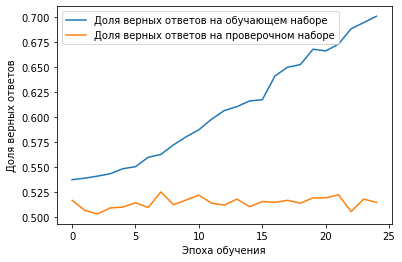

In [28]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверяем работу сети на тестовом наборе данных

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)

25000/25000 [==============================] - 1s 59us/sample - loss: 1.4626 - acc: 0.5089


In [0]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 50.888


## Направления улучшения распознавания

1. [Представление текста в виде вектора one hot encoding](https://colab.research.google.com/drive/1pw07gkY_axF5J5qtGbUwPXS36G5tW-bO).
2. [Представление текста в виде плотного векторного представления (embedding)](https://colab.research.google.com/drive/19b8owNo7vALRTU8hbhAuJbFU-mHlwB7U).